In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
tc=pd.read_csv('Telco_Customer_Churn.csv')

In [5]:
tc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
tc['TotalCharges']=tc['TotalCharges'].replace(' ','0')

In [7]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


REPLACING THE EMPTY SPACES IN TOTALCHARGES WITH 0 AND CONVERTING THE DATATYPE TO FLOAT

In [9]:
tc['TotalCharges']=tc['TotalCharges'].astype('float')


In [10]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
tc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
tc.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
tc.duplicated().sum()

0

In [19]:
tc['customerID'].duplicated().sum()

0

CONVERTING SENIOR CITIZEN VALUES FROM 0'S AND 1'S TO YES AND NO RESPECTIVELY

In [20]:
def conv(value):
    if value==1:
        return'Yes'
    else:
        return 'no'

tc['SeniorCitizen']=tc['SeniorCitizen'].apply(conv)

In [22]:
tc.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


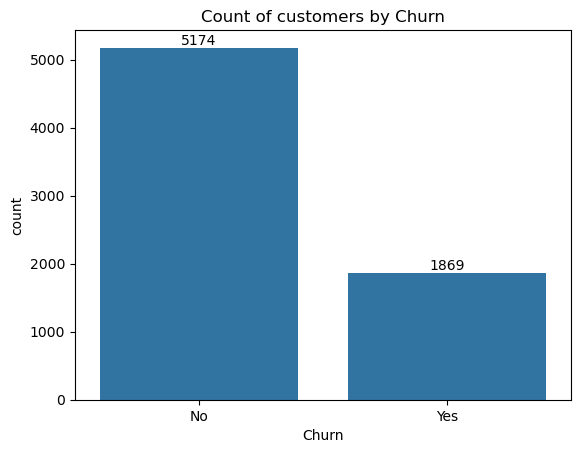

In [27]:
ax=sns.countplot(x=tc['Churn'], data = tc)
ax.bar_label(ax.containers[0])
plt.title('Count of customers by Churn')
plt.show()

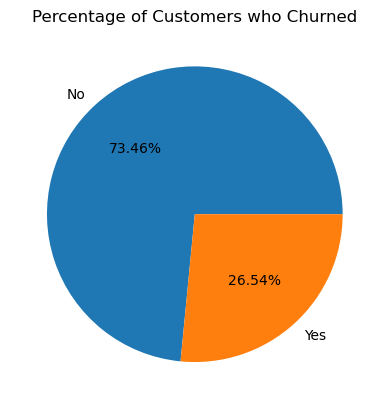

In [29]:
gb=tc.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%')
plt.title('Percentage of Customers who Churned')
plt.show()

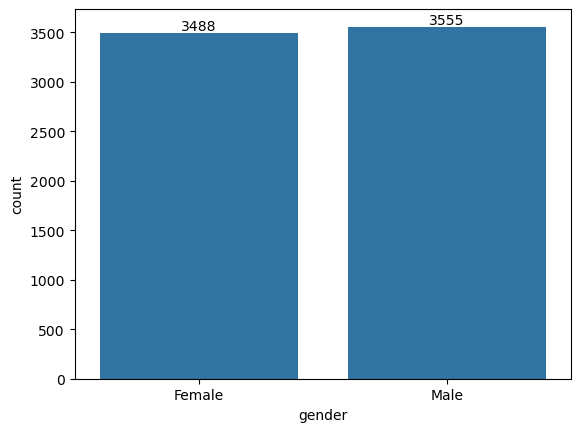

In [34]:
ay=sns.countplot(x=tc['gender'], data=tc)
ay.bar_label(ay.containers[0])
plt.show()

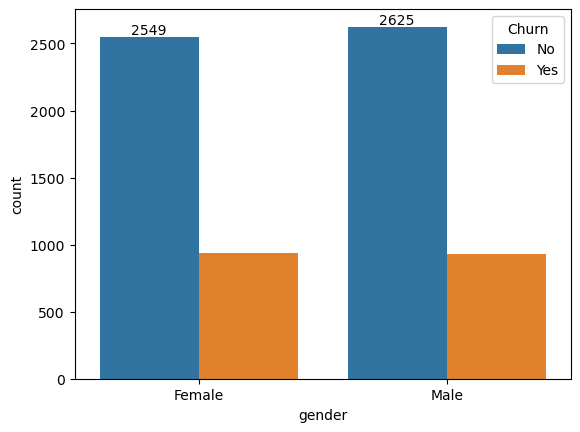

In [35]:
ay=sns.countplot(x=tc['gender'], data=tc, hue='Churn')
ay.bar_label(ay.containers[0])
plt.show()

THE ABOVE GRAPH PROVES REGARDLESS FEMALES OR MALES ALMOST EQUAL NUMBER OF PEOPLE FROM BOTH GENDER'S ARE CHURNING

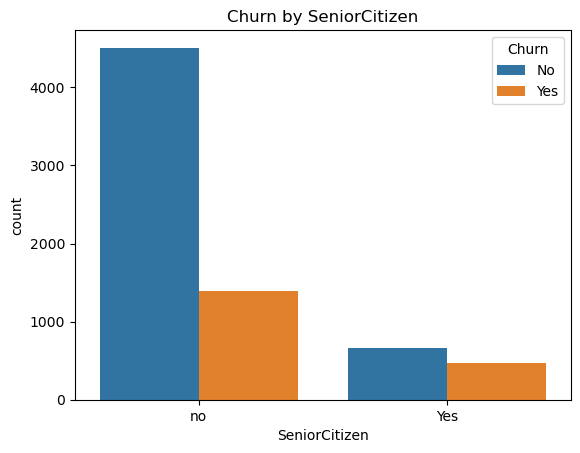

In [36]:
sns.countplot(x='SeniorCitizen', data=tc, hue= 'Churn')
plt.title('Churn by SeniorCitizen')
plt.show()

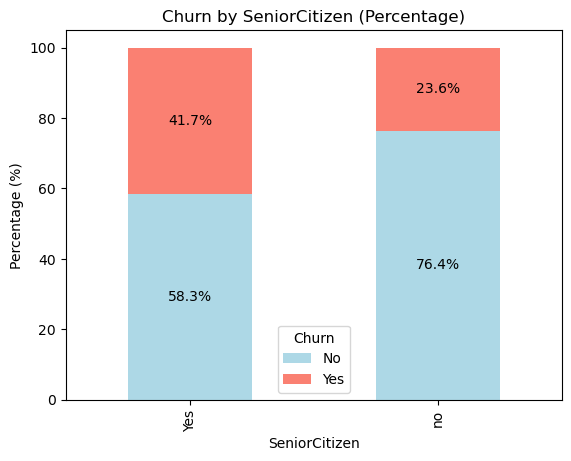

In [38]:

# Assuming 'tc' is your DataFrame
# Calculate the percentage of churn within each 'SeniorCitizen' group
churn_percentage = tc.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Normalize to get the percentage
churn_percentage = churn_percentage.div(churn_percentage.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
ax = churn_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

# Set plot title and labels
ax.set_title('Churn by SeniorCitizen (Percentage)')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('SeniorCitizen')

# Add percentage labels on top of the bars
for p in ax.patches:
    # Get the height of the bar
    height = p.get_height()
    # Get the x and y coordinates for the text label
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2
    # Add text label with percentage
    ax.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=10, color='black')

# Show the plot
plt.show()

FROM THE ABOVE CHART A MAJORITY PERCENTAGE OF SENIOR CITIZENS TURN TO CHURN AS COMPARED TO THE THOSE WHO ARE NOT SENIOR CITIZENS

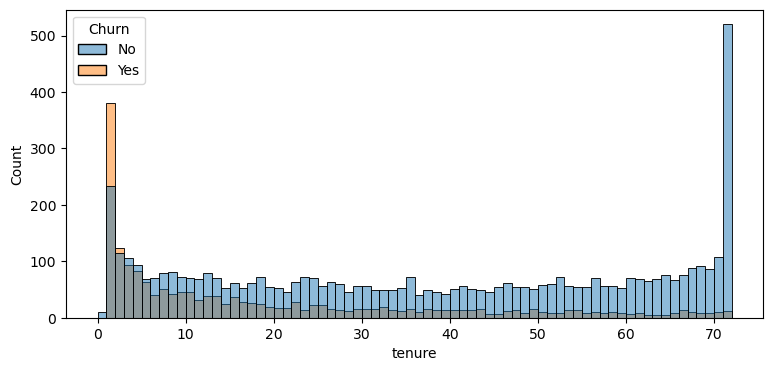

In [44]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure', data= tc, bins=72, hue='Churn')
plt.show()

FROM THE ABOVE GRAPH WE NOTICE THOSE WHO CHURNED HAVE NOT BEEN WITH THE COMPANY FOR LONG

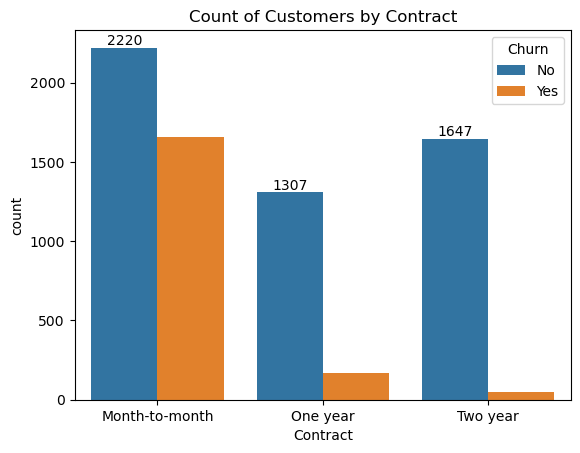

In [48]:
az=sns.countplot(x=tc['Contract'], data=tc, hue='Churn')
az.bar_label(az.containers[0])
plt.title('Count of Customers by Contract')
plt.show()

PEOPLE WHO HAVE A MONTH TO MONTH CONTRACT ARE MORE LIKELY TO CHURN AS COMPARED TO THOSE WITH 1 & 2 YEARS CONTRACTS

In [50]:
tc.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

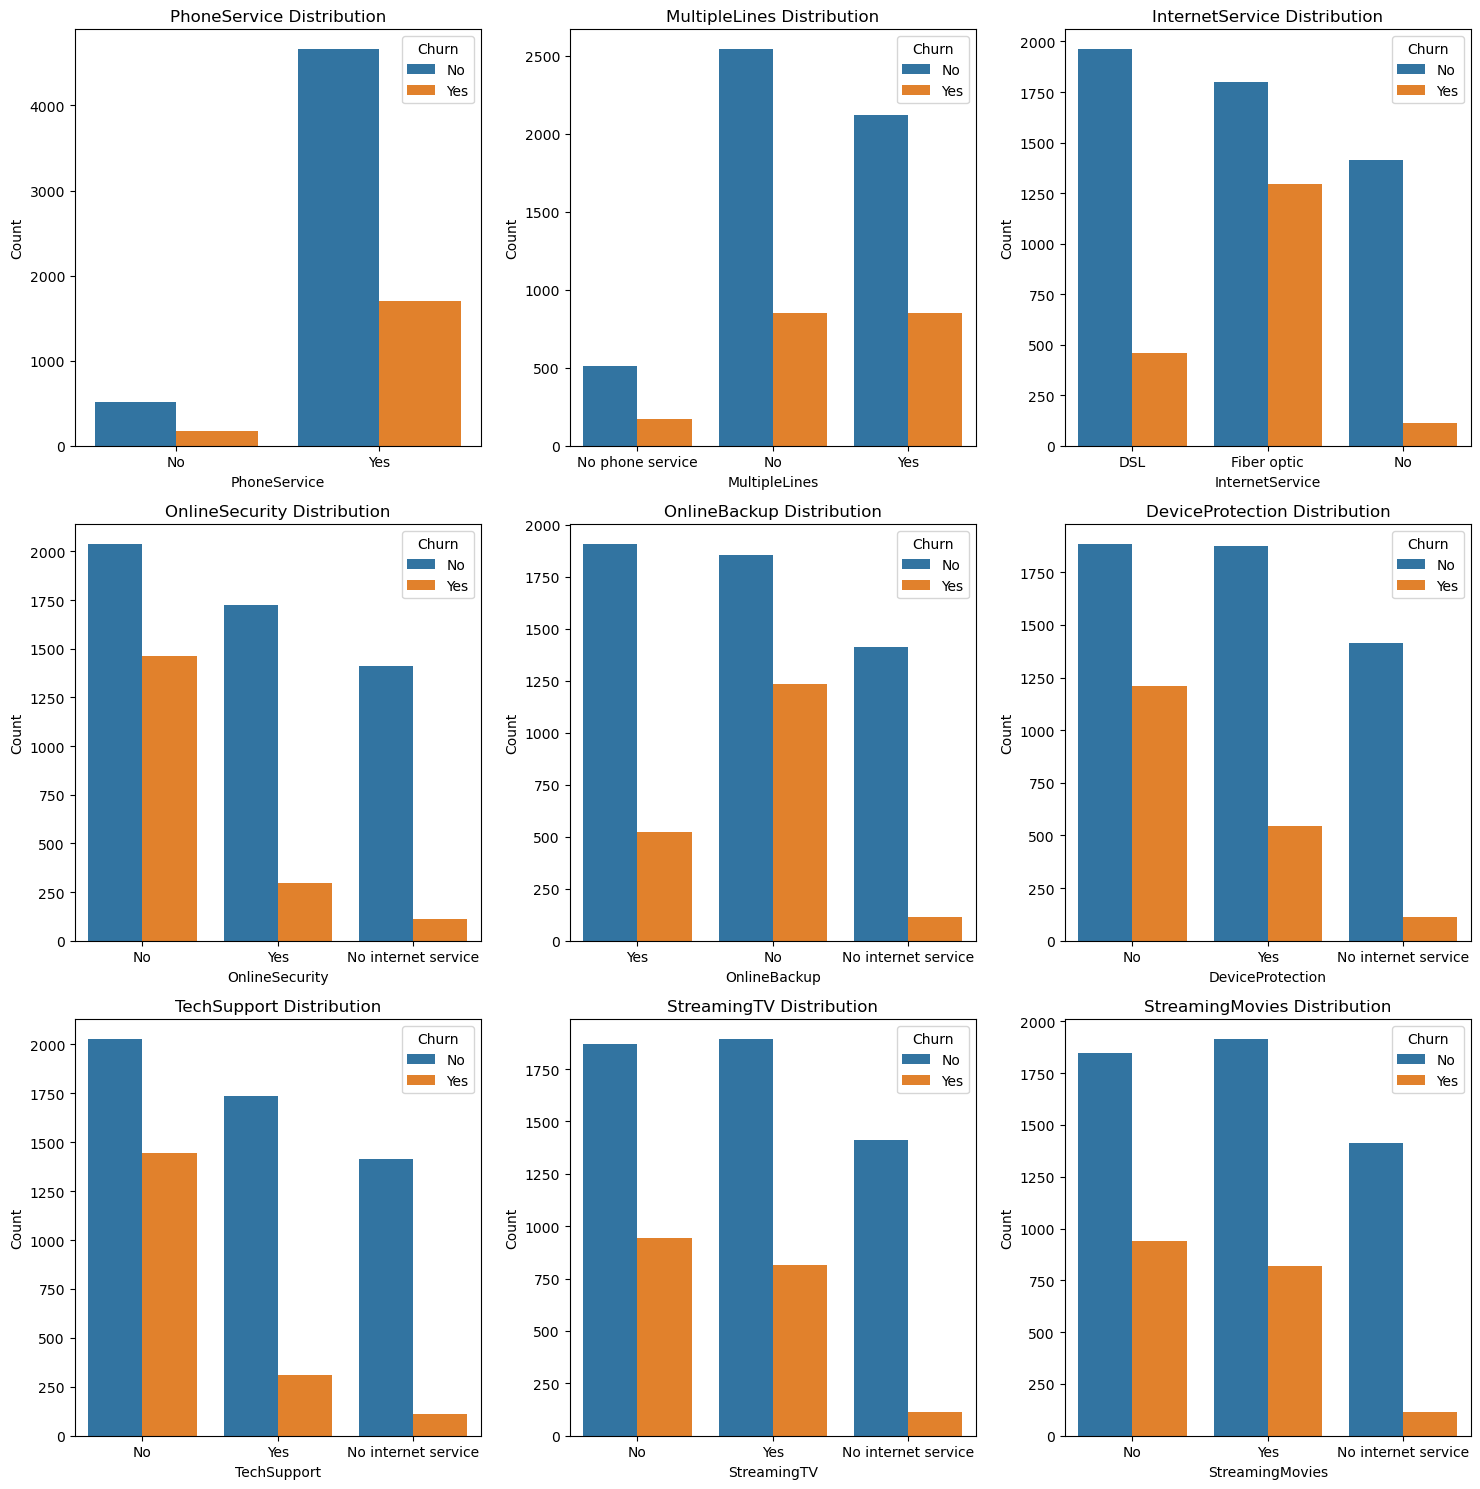

In [52]:

# List of the columns you want to create count plots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of rows and columns for the subplots
n_cols = 3  # Adjust this as needed
n_rows = (len(columns) + n_cols - 1) // n_cols  # This ensures all plots fit in the grid

# Set up the matplotlib figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

# Create a count plot for each column
for i, col in enumerate(columns):
    sns.countplot(x=col, data=tc, ax=axes[i], hue= tc['Churn'])  # 'tc' is your DataFrame
    axes[i].set_title(f'{col} Distribution')  # Set the title for each plot
    axes[i].set_xlabel(col)  # Set the x-axis label
    axes[i].set_ylabel('Count')  # Set the y-axis label

# Remove any empty subplots if the number of columns doesn't fit evenly
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to make sure everything fits
plt.tight_layout()

# Show the plot
plt.show()


The data visualizations display customer churn distributions across various service categories. Higher churn rates are evident among customers using services like fiber optic internet, lacking online security or support, and using streaming services. In contrast, customers with phone services and those who have additional protection services tend to show lower churn rates.

<function matplotlib.pyplot.show(close=None, block=None)>

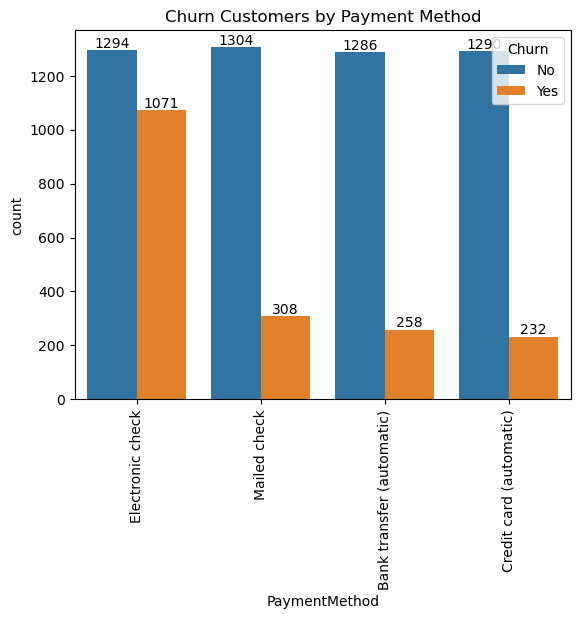

In [56]:
aa=sns.countplot(x=tc['PaymentMethod'], data=tc, hue='Churn')
aa.bar_label(aa.containers[0])
aa.bar_label(aa.containers[1])
plt.xticks(rotation=90)
plt.title('Churn Customers by Payment Method')
plt.show

COMPARATIVELY CHURNED CUSTOMERS ARE THOSE WHO USE ELECTRONIC CHECKS AS PAYMENT METHODS